In [1]:
import pickle
import pandas as pd
import sklearn

In [2]:
sklearn.__version__

'1.0.2'

In [3]:
!python -V

Python 3.9.12


In [7]:
!pip install --upgrade scikit-learn==1.5.0

     |████████████████████████████████| 13.4 MB 985 kB/s eta 0:00:01
     |████████████████████████████████| 301 kB 76.3 MB/s eta 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [8]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/codespace/anaconda3/lib/python3.9/site-packages
Requires: numpy, threadpoolctl, scipy, joblib
Required-by: scikit-learn-intelex


In [9]:
with open('model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [10]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [11]:
df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet')

In [12]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = model.predict(X_val)

In [13]:
y_pred

array([16.24590642, 26.1347962 , 11.88426424, ..., 11.59533603,
       13.11317847, 12.89999218])

In [14]:
y_pred.std()

6.247488852238703

Q1. Notebook
We'll start with the same notebook we ended up with in homework 1. We cleaned it a little bit and kept only the scoring part. You can find the initial notebook here.

Run this notebook for the March 2023 data.

What's the standard deviation of the predicted duration for this dataset?

1.24
6.24
12.28
18.28

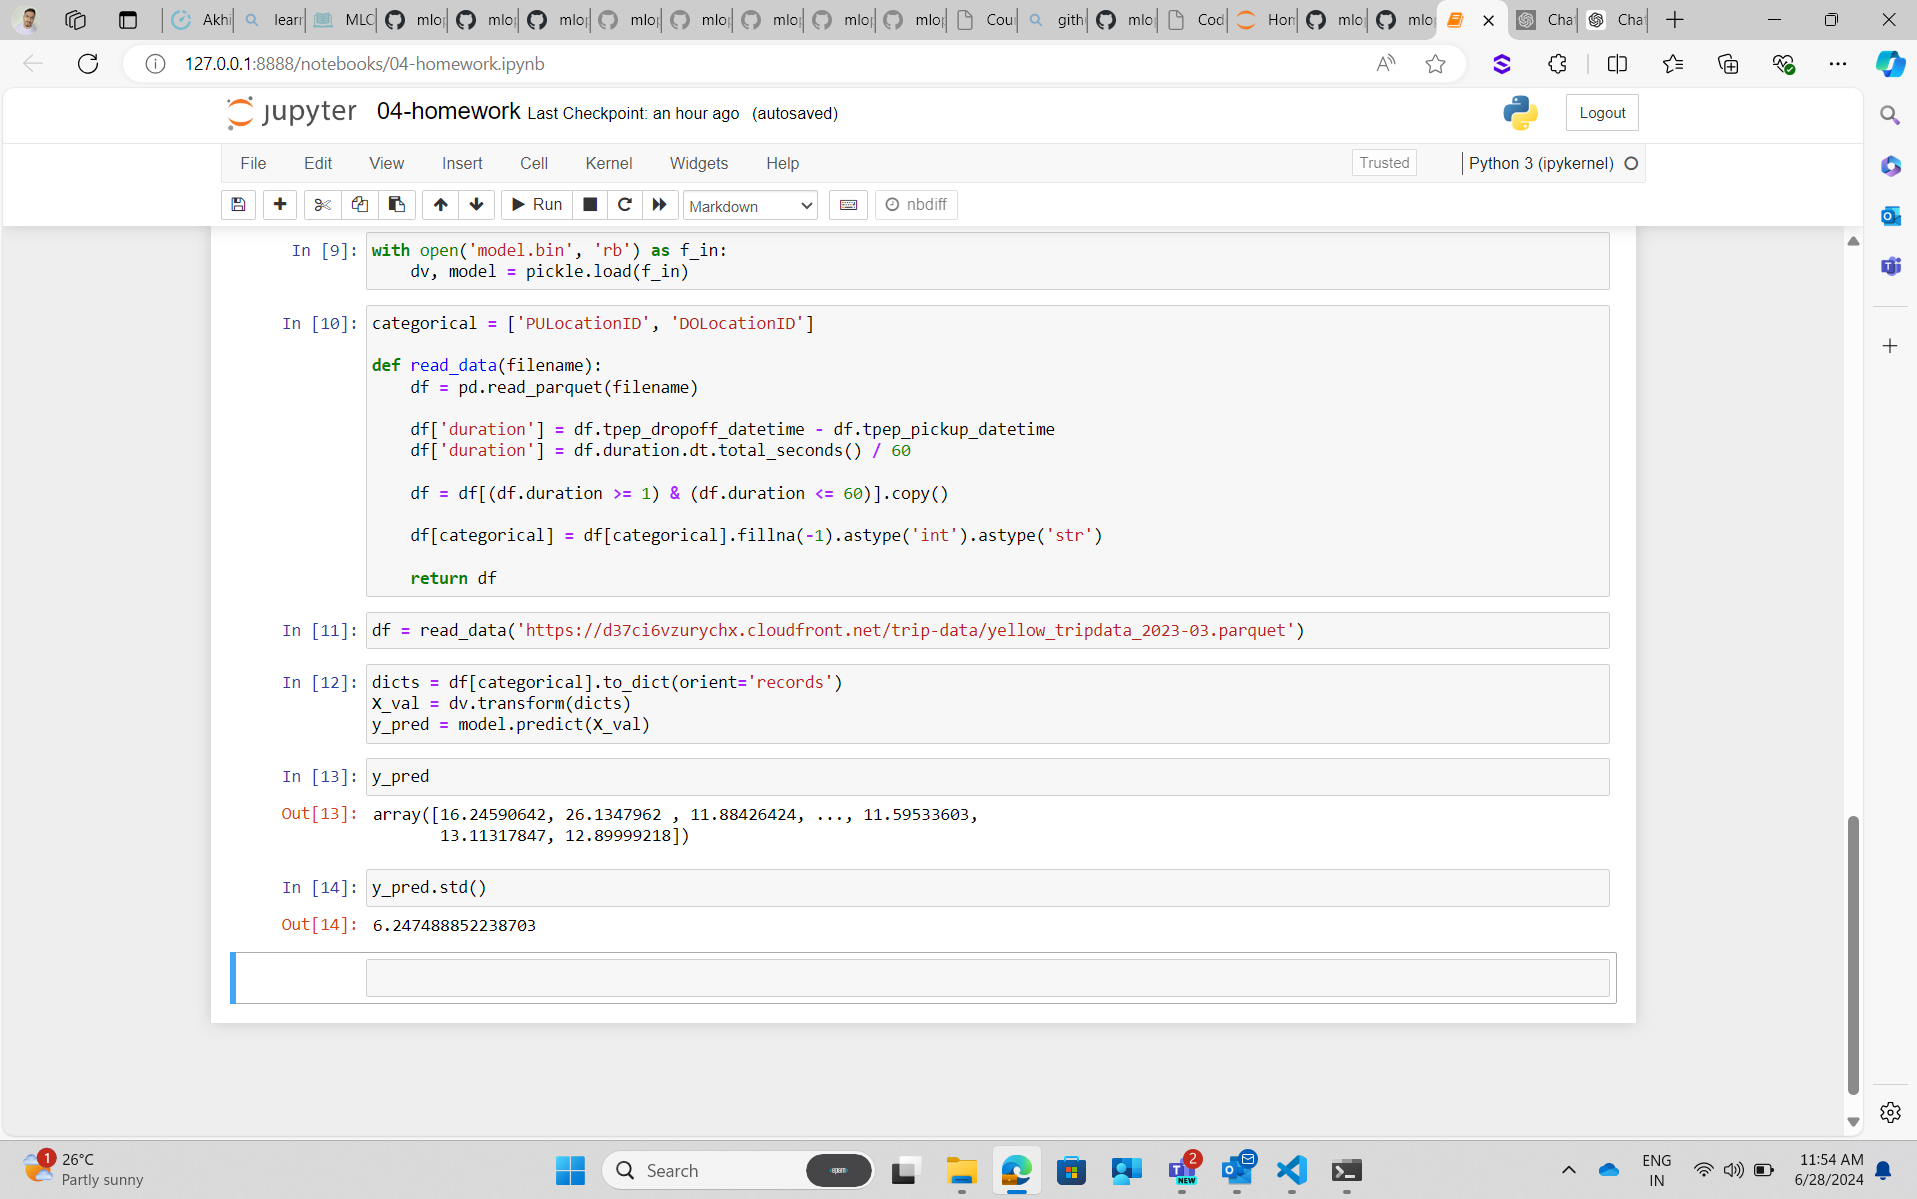

Answer: 6.247

In [16]:
year = 2023
month = 3

input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
output_file = f'output/yellow_tripdata_{year:04d}-{month:02d}.parquet'

In [17]:
!mkdir output

In [18]:
df = read_data(input_file)
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

In [19]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration,ride_id
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,...,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00,10.000000,2023/03_0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,...,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25,31.083333,2023/03_1
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,...,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00,14.366667,2023/03_2
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,...,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00,11.466667,2023/03_3
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,...,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00,3.033333,2023/03_4


In [20]:
df_result = pd.DataFrame()
df_result['ride_id'] = df['ride_id']
df_result['predicted_duration'] = y_pred

In [21]:
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [22]:
!ls -lh output

total 66M
-rw-rw-rw- 1 codespace codespace 66M Jun 28 06:30 yellow_tripdata_2023-03.parquet


Q2. Preparing the output
Like in the course videos, we want to prepare the dataframe with the output.

First, let's create an artificial ride_id column:

df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
Next, write the ride id and the predictions to a dataframe with results.

Save it as parquet:

df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
What's the size of the output file?

36M
46M
56M
66M
Note: Make sure you use the snippet above for saving the file. It should contain only these two columns. For this question, don't change the dtypes of the columns and use pyarrow, not fastparquet.

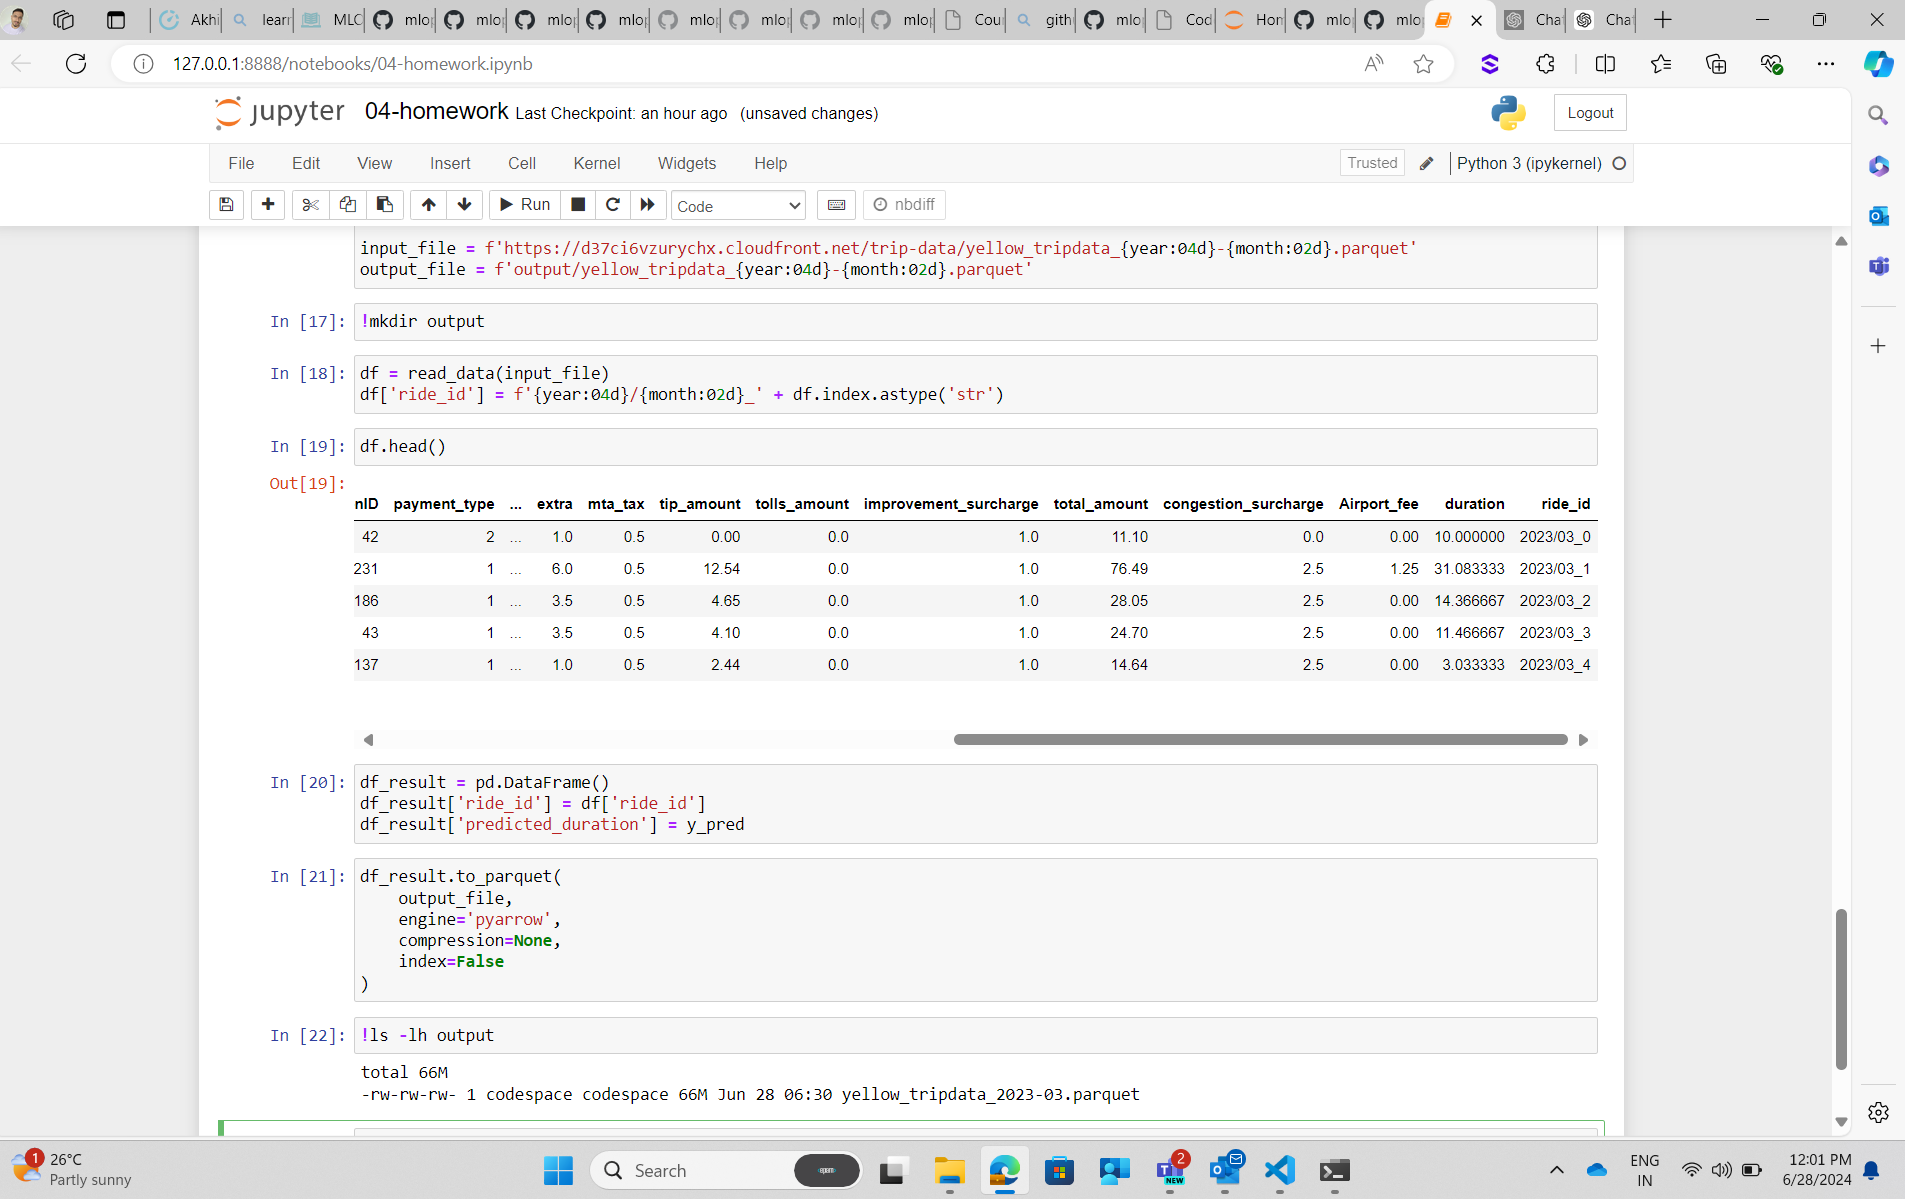

Answer: 66M

Q3. Creating the scoring script
Now let's turn the notebook into a script.

Which command you need to execute for that?

In [25]:
!jupyter nbconvert --to script 04-homework.ipynb

[NbConvertApp] Converting notebook 04-homework.ipynb to script
[NbConvertApp] Writing 3413 bytes to 04-homework.py


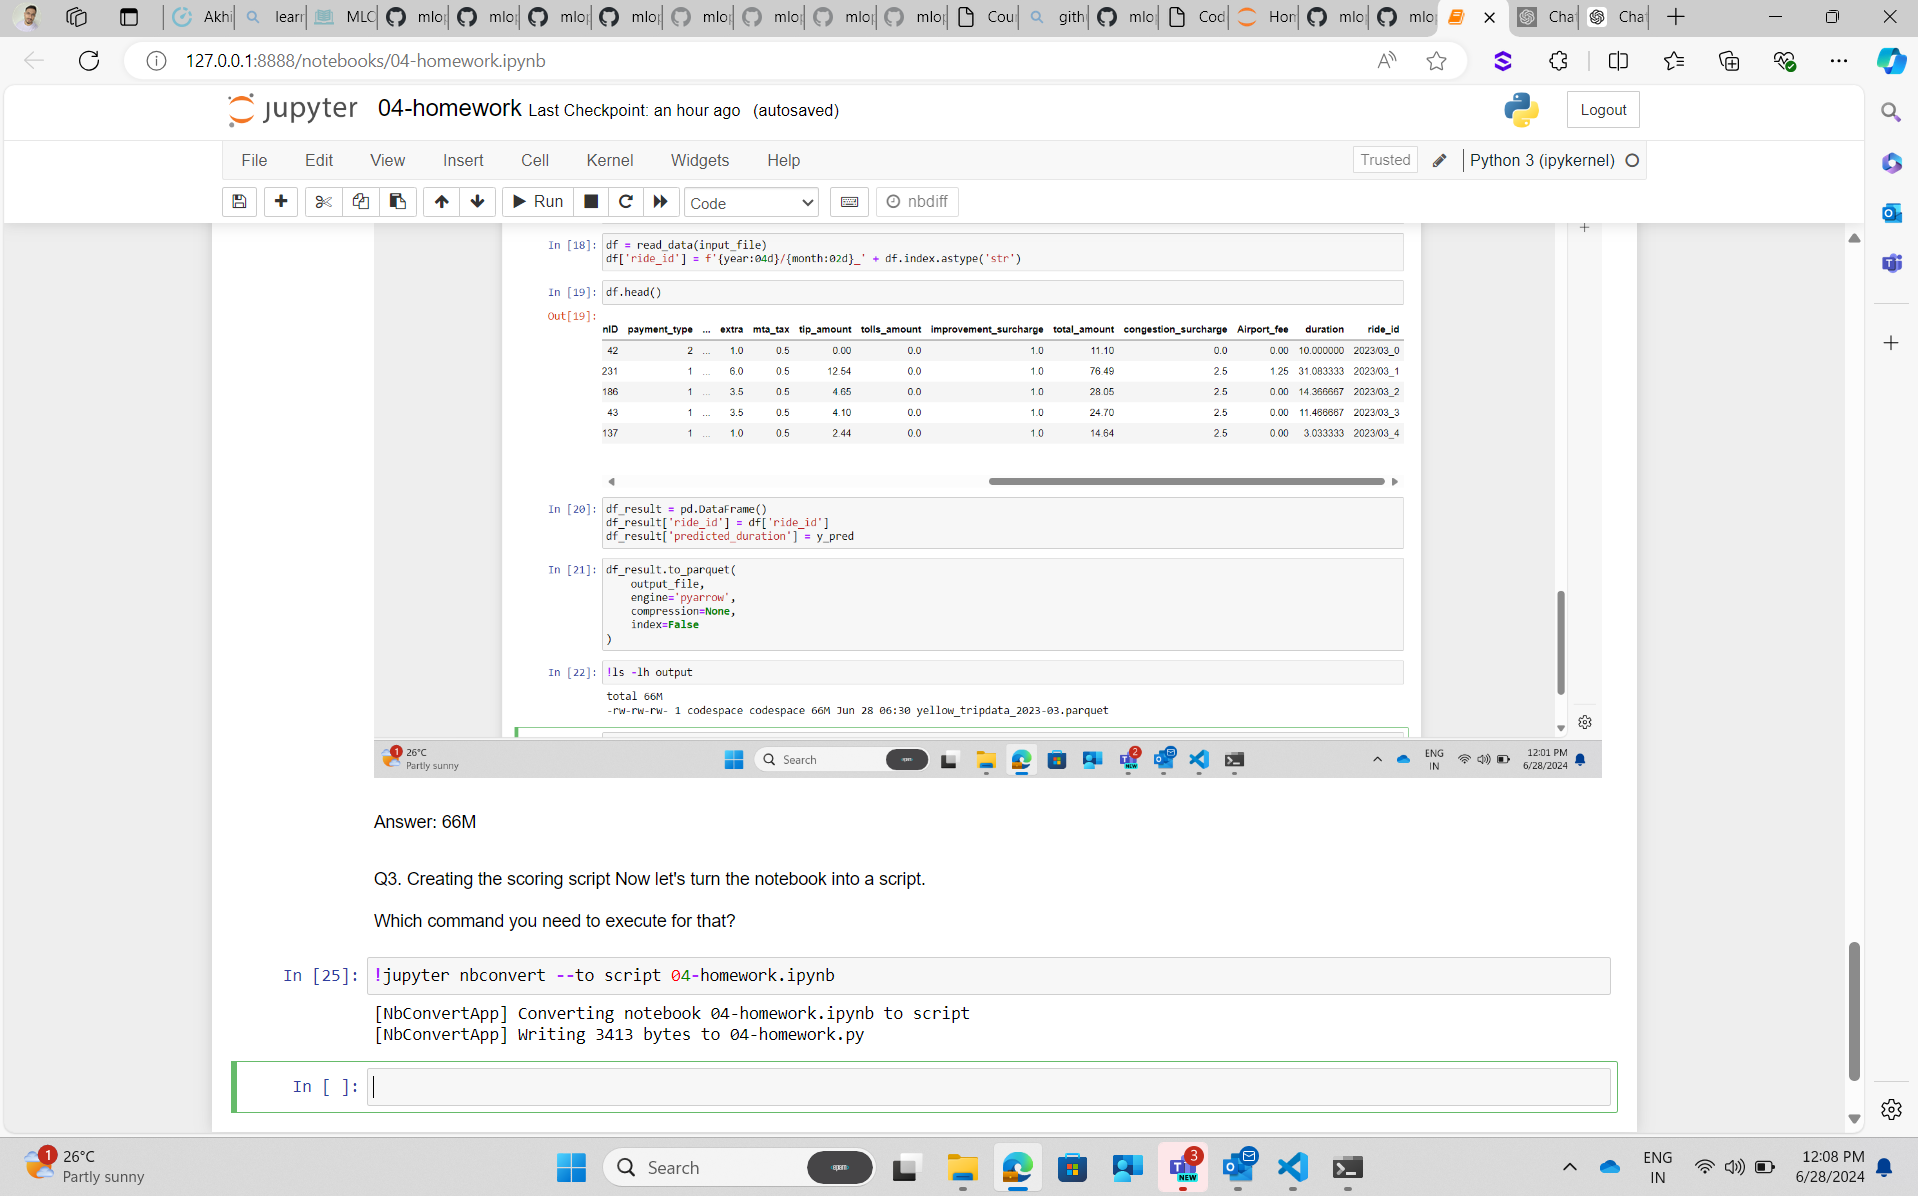

Answer: jupyter nbconvert --to script 04-homework.ipynb